In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=9db576333ef1e501ed14464c51ba11e5e624238c9e6df7366be008f390f4af59
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

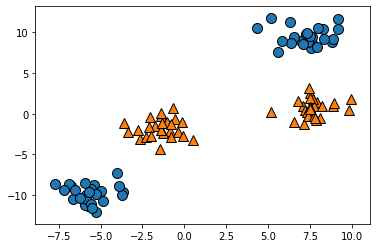

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [3]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
x,y = make_blobs(centers = 4,random_state= 8 ) #구분을 4개로 하여 선 그리기 어려운 모델로 만든다
y = y % 2
# 이진 분류 세트 시각화
# 클래스 2개로 분리, 이진분류
mglearn.discrete_scatter(x[:,0],x[:,1], y) #결과가 0 아니면 1 이라 직선 형 데이터 로는 분류 할수 가 없다.
plt.show()
y #0,1 2 3  -> 0 1 


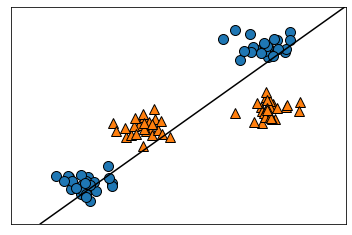

In [4]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC().fit(x,y)

mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

선형 모델과 비선형 특징

- 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적

- 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것

특성을 추가하여 입력 특성을 확장 (2차원 -> 3차원)

- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트

- (특성0, 특성1) -> (특성0, 특성1, 특성1 ** 2)
- 3차원 산점도로 표현(원래는 polynomial 을 사용하면 된다.)

Matplotlib은 mpl_tookits라는 모듈로 3차원 그래프를 그릴 수 있다.

Text(0.5, 0, 'feature 1 **2')

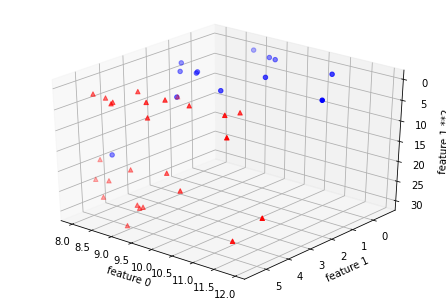

In [18]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가 
x_new  = np.hstack([x,x[:,1:] ** 2]) 
# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig,azim= -130,elev=-150)  #elev 는 위 아래 각도를 조절 azim 은 좌우 각도를 조절 
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = (y == 0)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='b')

mask = (y == 1)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='r',marker = '^')
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(x_new[~mask,0],x_new[mask,1],x_new[~mask,2],c='r',marker = '^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 **2')

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

[-0.00296548 -0.07082922  0.09789233]
2


Text(0.5, 0, 'feature 1 **2')

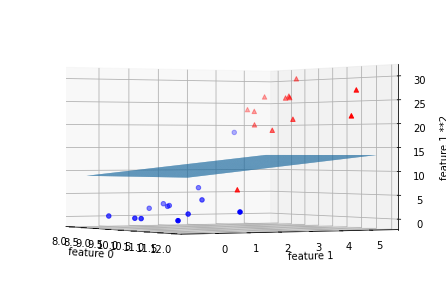

In [19]:
model = LinearSVC().fit(x_new , y)
w,b = model.coef_.ravel(),model.intercept_
print(w)
# 선형 결정 경계 그리기
# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig,azim= -30,elev=0)  #elev 는 위 아래 각도를 조절 azim 은 좌우 각도를 조절 

#3차원에서 선그리기
xx = np.linspace(x_new[:,0].min(),x_new[:,0].max(),50)
yy = np.linspace(x_new[:,1].min(),x_new[:,1].max(),50)

XX,YY = np.meshgrid(xx,yy) #xx yy 를 같은 2차원으로 만든다 
ZZ = -(w[0] * XX + w[1] * YY + b)/w[2] #3차원 방정식
print(ZZ.ndim)

ax.plot_surface(XX,YY,ZZ) #평면 그리기 
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = (y == 0)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='b')

mask = (y == 1)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='r',marker = '^')
# ~ 비트 NOT : x의 비트를 뒤집음
#ax.scatter(x_new[~mask,0],x_new[mask,1],x_new[~mask,2],c='r',marker = '^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 **2')

In [8]:
# 분류 결과 시각화


- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

마진을 구하는 알고리즘  종류라고 생각하면 된다.
- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

11


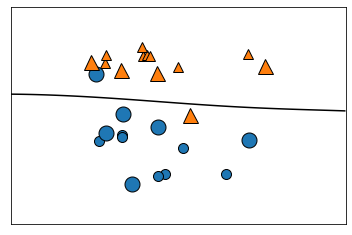

In [25]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

x,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)

model = SVC(C = 1 , gamma= 0.1).fit(x,y)#내부적으로 3차원 다항식에 만들어 도록 디폴트 되있음  C,gamma 가 중요함
mglearn.plots.plot_2d_separator(model,x) #직선이 아닌 degree 3 인 곡선형 형태를 나타낸다.
#SVM 

sv = model.support_vectors_
print(len(sv)) #특성이 두개 씩 들어가 있는 데이터 
model.dual_coef_ # support_vector 하고의 가중치 값이 들어 가 있음  
sv_labels = model.dual_coef_.ravel() >0 #dual.coef_ 에 의해 서포트 백터 의 클래스 레이블 결정 
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels , s= 15) #sv 가 직선 과의 얼마나 떨어지는지 알아본다


- 선형이 아닌 부드러운 비선형 경계를 만들어냄
- C와 gamma 두 매개변수를 사용

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당 (훈련 샘플에 영향을 미치는 범위)
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한 sv 의 수를 제한 한다.

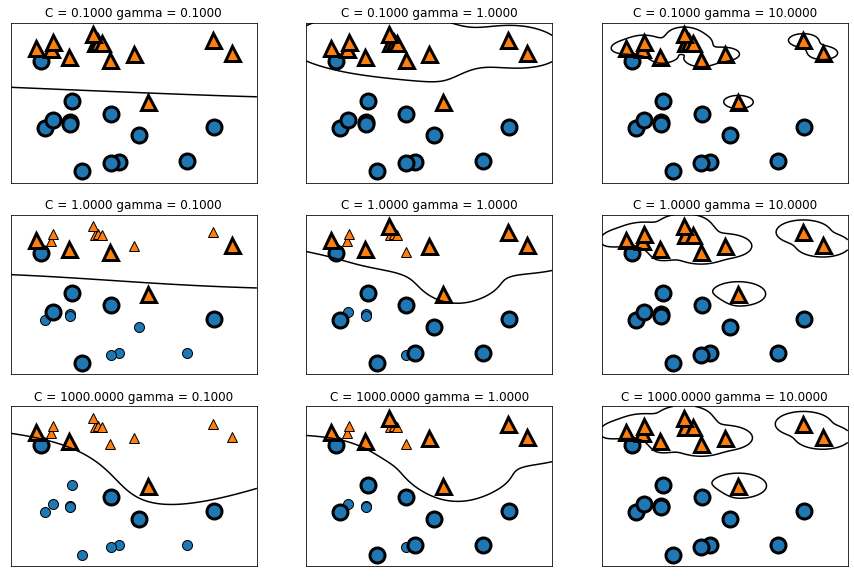

In [10]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for C, ax in zip([-1, 0, 3], axes):
  for gamma, a in zip(range(-1, 2), ax):
    mglearn.plots.plot_svm(C, gamma, a)


#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

# 모델 학습
model = SVC(C = 100,gamma = 0.01).fit(train_x,train_y)
'''
gamma = scale -> 데이터 가 다르더라도 규모에 맞게 자동으로 수정이 된다.
근데 튜닝을 하면 급 감 한다. 
'''


# 평가
print(model.score(train_x,train_y) , model.score(test_x,test_y))

1.0 0.6223776223776224


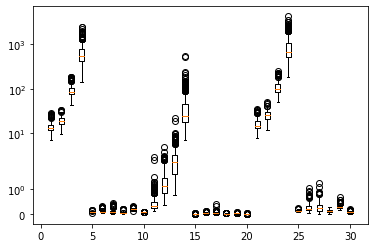

'\n4번 특성이 이상치가 많고 \n값의 편차가 너무 큼 \n-> 줄여야 함\n'

In [44]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)
plt.boxplot(train_x,manage_ticks= False)
plt.yscale('symlog')
plt.show()
'''
4번 특성이 이상치가 많고 
값의 편차가 너무 큼 
-> 줄여야 함
특성이 ㄹㅇ 제각각
'''

- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [50]:
from sklearn.preprocessing import MinMaxScaler #min max normalization

scaler = MinMaxScaler()
scaler.fit(train_x) #들어가는 변수를 기준으로 scale 조정을 한다.
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

'''
x = MinMaxscaler().fit_transform(X)
즉 특성 값이 0 ~ 1 사이의 값으로 만들어 진다.
'''

print(train_x_scaled.min())
print(train_x_scaled.max(axis = 0))

0.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


##### 스케일링된 데이터를 SVC에 적용하기

In [51]:
# gamma 파라미저 조정
model = SVC(C = 10 ,gamma = 0.02).fit(train_x_scaled,train_y)
model.score(train_x_scaled,train_y),model.score(test_x_scaled,test_y)

(0.9741784037558685, 0.965034965034965)

In [55]:
# C 파라미터 조정
model = SVC(C = 1000 ,gamma = 0.02).fit(train_x_scaled,train_y)
model.score(train_x_scaled,train_y),model.score(test_x_scaled,test_y)
'''
기본은 C를 움직이고 gamma 를 움직이면서 튜닝 
'''

(0.9882629107981221, 0.972027972027972)

## 장단점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정